# **Limpieza de Dataset de papas**

## **Curso:** Aprendizaje Automático

---

**Carrera:** Escuela profesional de Ingenieria Informatica y de Sistemas

**Institucion:** Universidad Nacional de San Antonio Abad del Cusco

**Integrantes:**
* Anggie Antuane Huaman Morales
* Mei-ling, Biggerstaff Pumacahua
* Dylan Patrick Meza Challco
*  Rony Wilson Quinaya Mejia
---

## <a name="Escritura">Descripcion del ejercicio</a>





Procesar dataset de papas, extraer caracteristicas y descargarlas en formato CSV

In [ ]:
#@title importar librerias
from rembg import remove
from PIL import Image
import os
import io
import concurrent.futures
import requests
import matplotlib.pyplot as plt
from IPython.display import Markdown
import cv2
import numpy as np
import csv
from sklearn.cluster import KMeans
from skimage.feature import local_binary_pattern


In [ ]:
#@title Clonar el repositorio necesario para este Colab
!git clone https://github.com/github0dot5Ane/DatasetPapas.git

Cloning into 'DatasetPapas'...
remote: Enumerating objects: 5176, done.
remote: Counting objects: 100% (1913/1913), done.
remote: Compressing objects: 100% (1888/1888), done.
remote: Total 5176 (delta 24), reused 1912 (delta 23), pack-reused 3263 (from 1)
Receiving objects: 100% (5176/5176), 492.86 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (4865/4865), done.


## <a name="Escritura">Procesar imagenes</a>

In [ ]:

#@title Acceder a imagenes y procesar
import os
import io
import concurrent.futures
from PIL import Image
from removebg import remove  # Asegúrate de tener un módulo o función para eliminar el fondo

# Ruta de carpetas de entrada y salida
input_folder = "C:\\papas"           # Carpeta de imágenes de entrada
output_folder = "C:\\papaslimpias"    # Carpeta para guardar imágenes procesadas

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Procesar una sola imagen para eliminar el fondo
def process_image(input_path, output_path):
    with open(input_path, "rb") as input_file:
        input_data = input_file.read()
        output_data = remove(input_data)  # Eliminar el fondo de la imagen

        # Abrir la imagen procesada y guardarla en la ruta de salida
        img = Image.open(io.BytesIO(output_data))
        img.save(output_path)

    print(f"Imagen sin fondo guardada en: {output_path}")

# Procesar todas las imágenes en una carpeta, incluyendo subcarpetas
def process_folder():
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for root, _, files in os.walk(input_folder):
            for filename in files:
                if filename.lower().endswith((".jpg", ".jpeg", ".png")):  # Filtrar solo imágenes
                    input_path = os.path.join(root, filename)

                    # Crear subcarpetas de salida según la estructura de entrada
                    relative_path = os.path.relpath(root, input_folder)
                    output_dir = os.path.join(output_folder, relative_path)
                    os.makedirs(output_dir, exist_ok=True)

                    output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.png")

                    # Enviar la tarea de procesamiento de imagen al executor
                    futures.append(executor.submit(process_image, input_path, output_path))

        # Esperar a que todas las tareas de procesamiento finalicen
        concurrent.futures.wait(futures)

print("Proceso completado.")
process_folder()



In [ ]:
#@title Acceder a las imagenes dentro de github
os.chdir('DatasetPapas/Imagenes procesadas 300 x 300')

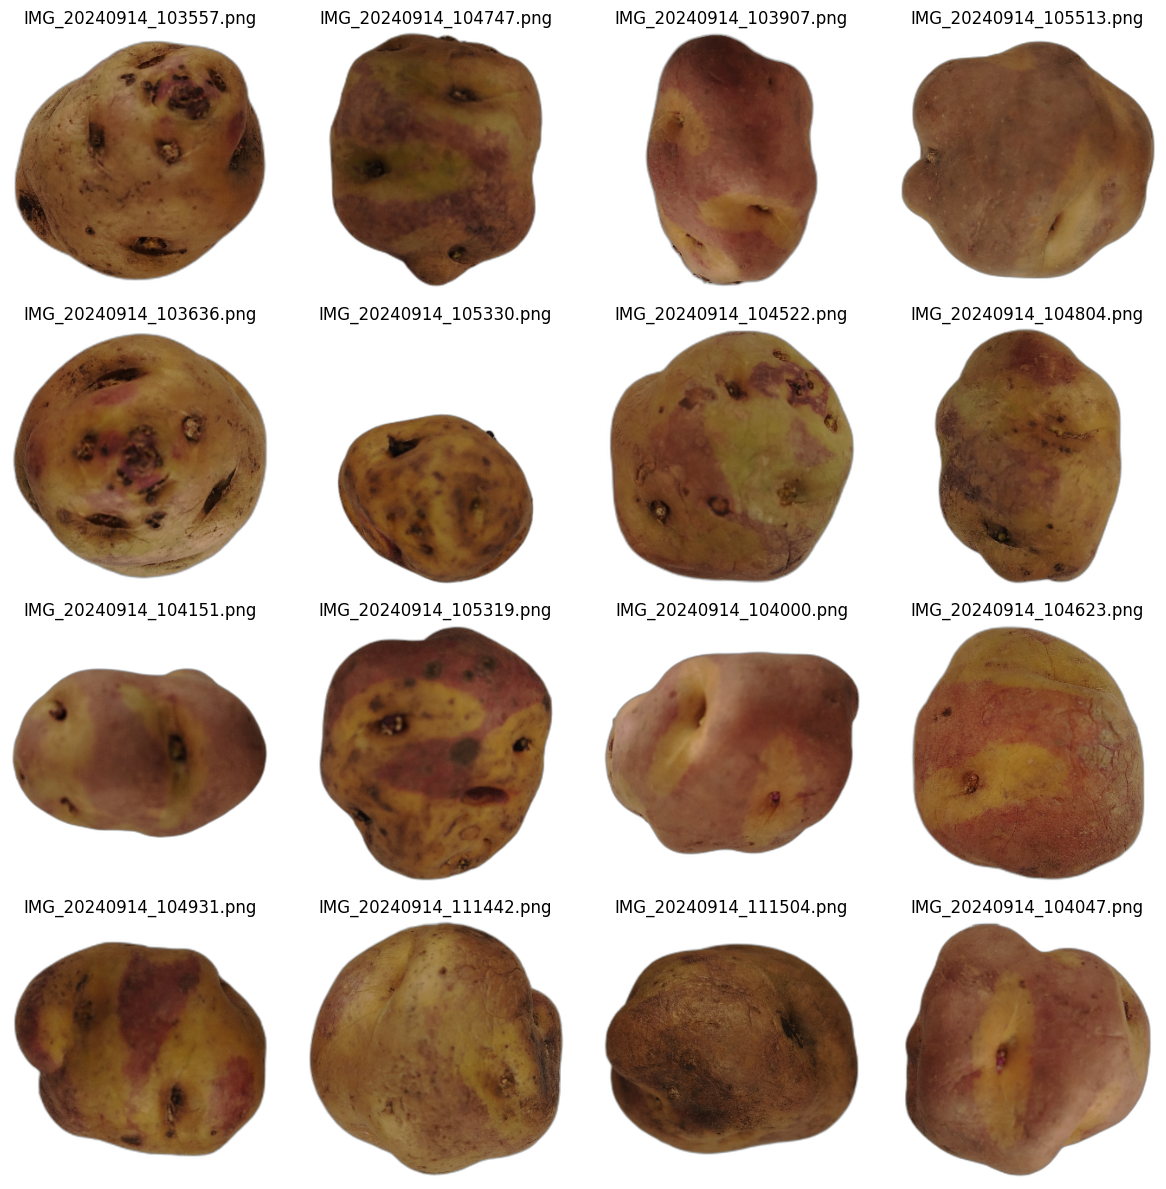

In [ ]:
#@title mostrar algunas imagenes dentro de el github
# Obtener lista de archivos en el directorio actual
internalFiles = [img for img in os.listdir()]

# Cambiar al primer subdirectorio encontrado en `internalFiles` (donde se encuentran las imágenes)
os.chdir(f'{internalFiles[0]}')
imagenes = [img for img in os.listdir()]

# Configurar la cuadrícula de la figura para mostrar las imágenes
fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Crear una cuadrícula de 4x4 para mostrar hasta 16 imágenes

# Recorrer cada imagen y mostrarla en la cuadrícula
for ax, img in zip(axs.ravel(), imagenes):  # `axs.ravel()` aplana la matriz de ejes para un fácil acceso
    ax.imshow(plt.imread(img))  # Cargar y mostrar la imagen
    ax.axis('off')              # Ocultar los ejes de cada imagen
    ax.set_title(img)           # Asignar el nombre del archivo como título de la imagen

plt.tight_layout()  # Ajustar el espacio entre imágenes para mejor visualización
plt.show()          # Mostrar todas las imágenes en la cuadrícula

In [ ]:
#@title Clonar dataset de papas
!git clone https://github.com/github0dot5Ane/DatasetPapas.git

Cloning into 'DatasetPapas'...
remote: Enumerating objects: 5176, done.
remote: Counting objects: 100% (1913/1913), done.
remote: Compressing objects: 100% (1888/1888), done.
remote: Total 5176 (delta 24), reused 1912 (delta 23), pack-reused 3263 (from 1)
Receiving objects: 100% (5176/5176), 492.86 MiB | 24.25 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (4865/4865), done.


In [ ]:
#@title Listar las imagenes de el tipo 01
!ls "DatasetPapas/Imagenes procesadas 300 x 300/1"


'20240914_100637[1].png'  '20240914_102434[1].png'  '20240914_103808[1].png'
'20240914_100645[1].png'  '20240914_102453[1].png'  '20240914_103822[1].png'
'20240914_100732[1].png'  '20240914_102524[1].png'  '20240914_103851[1].png'
'20240914_100757[1].png'  '20240914_102618[1].png'  '20240914_103924[1].png'
'20240914_100844[1].png'  '20240914_102742[1].png'  '20240914_104047[1].png'
'20240914_101133[1].png'  '20240914_102948[1].png'  '20240914_104302[1].png'
'20240914_101252[1].png'  '20240914_103010[1].png'  '20240914_104323[1].png'
'20240914_101448[1].png'  '20240914_103028[1].png'  '20240914_104337[1].png'
'20240914_101603[1].png'  '20240914_103042[1].png'  '20240914_104545[1].png'
'20240914_101656[1].png'  '20240914_103055[1].png'  '20240914_104742[1].png'
'20240914_101713[1].png'  '20240914_103149[1].png'  '20240914_104859[1].png'
'20240914_101743[1].png'  '20240914_103212[1].png'  '20240914_104914[1].png'
'20240914_101805[1].png'  '20240914_103318[1].png'  '20240914_104926[1].png'

In [ ]:
#@title Funciones para procesar imagenes
# Función para procesar una imagen y extraer características
def procesar_imagen(image_path):
    # Cargar la imagen con canal alfa
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        return "Error: No se pudo cargar la imagen."

    # Separar los canales de color (B, G, R) y el canal alfa (transparencia)
    b, g, r, alpha = cv2.split(image)

    # Crear una máscara para detectar píxeles visibles (donde el alfa > 0)
    mask = alpha > 0
    r_visible = r[mask]
    g_visible = g[mask]
    b_visible = b[mask]

    # Calcular el promedio de cada canal de color visible
    r_promedio = np.mean(r_visible)
    g_promedio = np.mean(g_visible)
    b_promedio = np.mean(b_visible)

    # Agrupar colores visibles para identificar el color secundario usando K-means
    rgb_visible = np.column_stack((r_visible, g_visible, b_visible))
    k = 3
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rgb_visible)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    label_counts = np.bincount(labels)
    sorted_indices = np.argsort(label_counts)[::-1]
    color_secundario = centers[sorted_indices[1]]

    # Convertir la máscara a tipo uint8 para encontrar contornos
    mask_uint8 = mask.astype(np.uint8) * 255
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calcular la circularidad y relación de aspecto del contorno principal (más grande)
    circularidad = 0
    aspect_ratio = 0
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter > 0:
            circularidad = (4 * np.pi * area) / (perimeter ** 2)
        x, y, width, height = cv2.boundingRect(contour)
        aspect_ratio = width / height if height > 0 else 0

    # Convertir la imagen a escala de grises y calcular el brillo promedio en la zona visible
    gray_image = cv2.cvtColor(cv2.merge([b, g, r]), cv2.COLOR_BGR2GRAY)
    visible_pixels = gray_image[mask]
    brillo_promedio = np.mean(visible_pixels) if visible_pixels.size > 0 else 0

    # Calcular rugosidad usando el patrón binario local (LBP) en la región visible
    radius = 3
    n_points = 8 * radius
    lbp_full = local_binary_pattern(gray_image, n_points, radius, method="uniform")
    lbp_visible = lbp_full[mask]
    lbp_hist, _ = np.histogram(lbp_visible.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= lbp_hist.sum()
    lbp_roughness = -np.sum(lbp_hist * np.log2(lbp_hist + 1e-6))

    # Devolver las características extraídas en una lista
    return [
        r_promedio, g_promedio, b_promedio,
        color_secundario[0], color_secundario[1], color_secundario[2],
        circularidad, aspect_ratio, brillo_promedio, lbp_roughness
    ]

# Función para procesar todas las imágenes en un directorio y guardar resultados en un archivo CSV
def procesar_imagenes_en_subcarpetas(root_folder, output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Escribir encabezados de columnas en el archivo CSV
        writer.writerow([
            "Carpeta principal", "Subcarpeta", "Nombre de imagen", "R_promedio", "G_promedio", "B_promedio",
            "Color_secundario_R", "Color_secundario_G", "Color_secundario_B",
            "Circularidad", "Relación de aspecto", "Brillo promedio", "Rugosidad LBP"
        ])

        # Recorrer todas las subcarpetas y procesar imágenes en cada una
        for root, dirs, files in os.walk(root_folder):
            for filename in files:
                if filename.endswith(('.png', '.jpg', '.jpeg')):  # Filtrar solo imágenes
                    image_path = os.path.join(root, filename)
                    resultado = procesar_imagen(image_path)
                    if isinstance(resultado, list):
                        # Escribir resultados en el CSV
                        main_folder = os.path.basename(root_folder)
                        subfolder = os.path.relpath(root, root_folder)
                        writer.writerow([main_folder, subfolder, filename] + resultado)


In [ ]:
#@title Descar el resultado en formato CSV
# Definir rutas para la carpeta de imágenes y el archivo CSV de salida
root_folder = 'DatasetPapas/Imagenes procesadas 300 x 300/83'
output_csv = 'DatasetPapas/resultados_imagenes.csv'

# Procesar imágenes y guardar resultados en el archivo CSV
procesar_imagenes_en_subcarpetas(root_folder, output_csv)

# Mostrar la ubicación del archivo CSV generado
print("Resultados guardados en:", output_csv)



Resultados guardados en: DatasetPapas/resultados_imagenes.csv
